In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

from stardist.models import StarDist2D 
from stardist.data import test_image_nuclei_2d
from stardist.plot import render_label
from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
from csbdeep.utils import normalize

2022-09-23 10:46:34.810164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-23 10:46:34.904712: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-23 10:46:34.904727: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-23 10:46:34.925110: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-23 10:46:35.377598: W tensorflow/stream_executor/platform/de

In [2]:
# prints a list of available models 
StarDist2D.from_pretrained()

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


In [3]:
# Define a pretrained model to segment nuclei in fluorescence images (download from pretrained)
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


2022-09-23 10:46:36.007357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-23 10:46:36.007513: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-23 10:46:36.007552: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-23 10:46:36.007587: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-23 10:46:36.007620: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

1/1 [==============================] - 0s 226ms/step


Text(0.5, 1.0, 'prediction + input overlay')

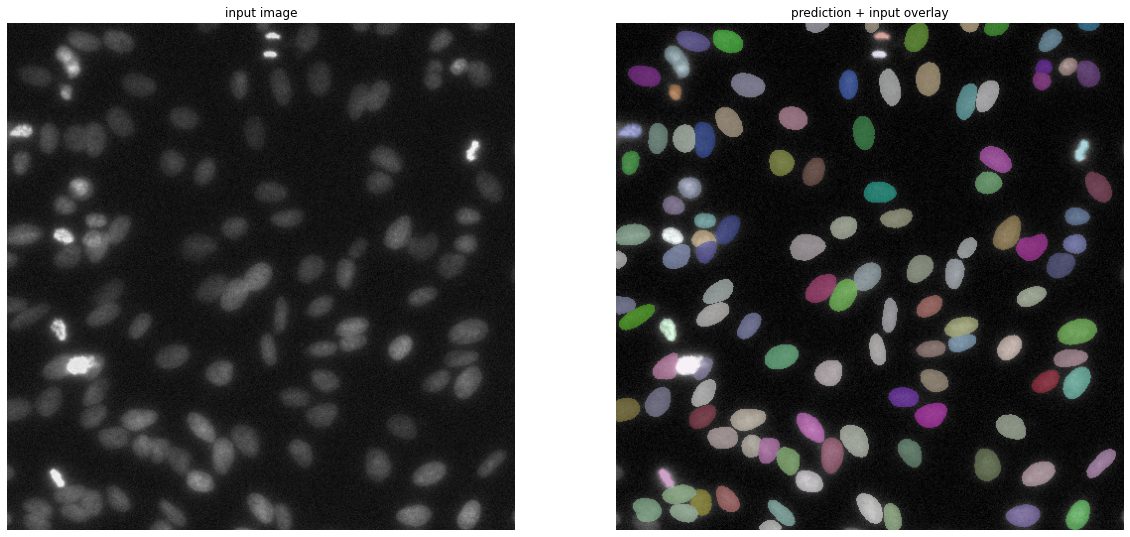

In [4]:
img = test_image_nuclei_2d() 

labels, _ = model.predict_instances(normalize(img))

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("prediction + input overlay")

(-0.5, 1003.5, 1001.5, -0.5)

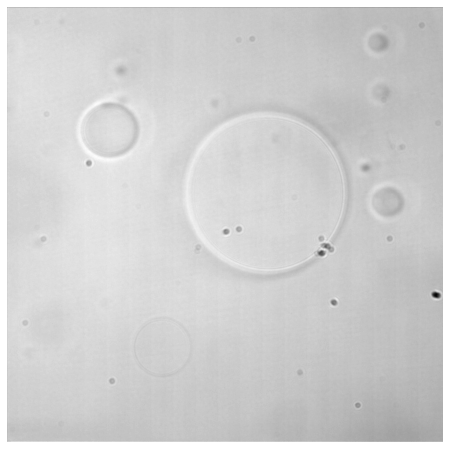

In [5]:
from skimage import io

img = io.imread("Data/20220303_GUV_NTA2_on_SOPC2/9_bf.jpg", as_gray=True)

plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray')
plt.axis("off")

In [6]:
labels, details = model.predict_instances(normalize(img))

1/1 [==============================] - 0s 391ms/step


Text(0.5, 1.0, 'prediction + input overlay')

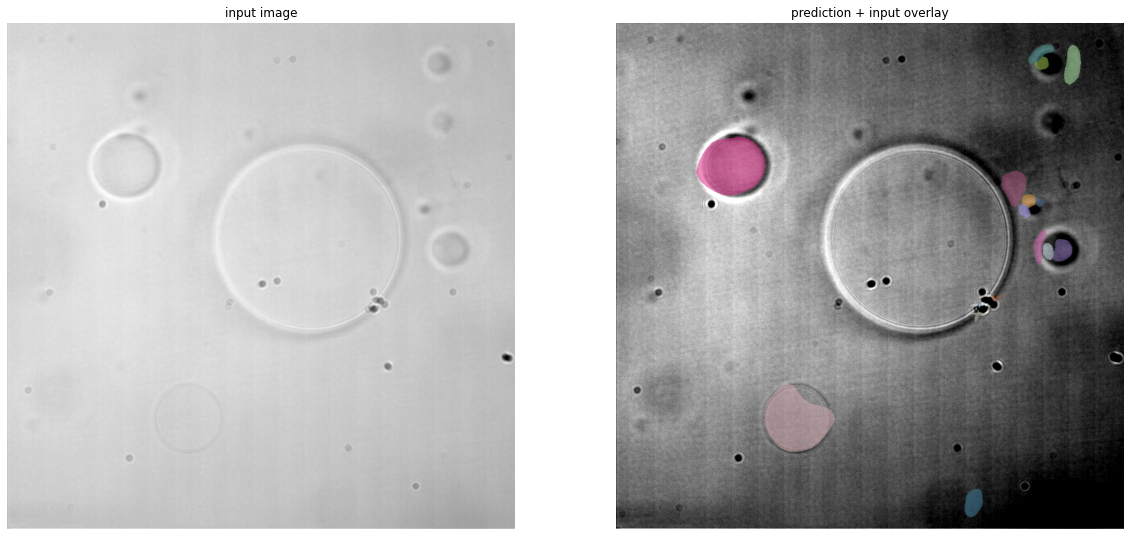

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("prediction + input overlay")

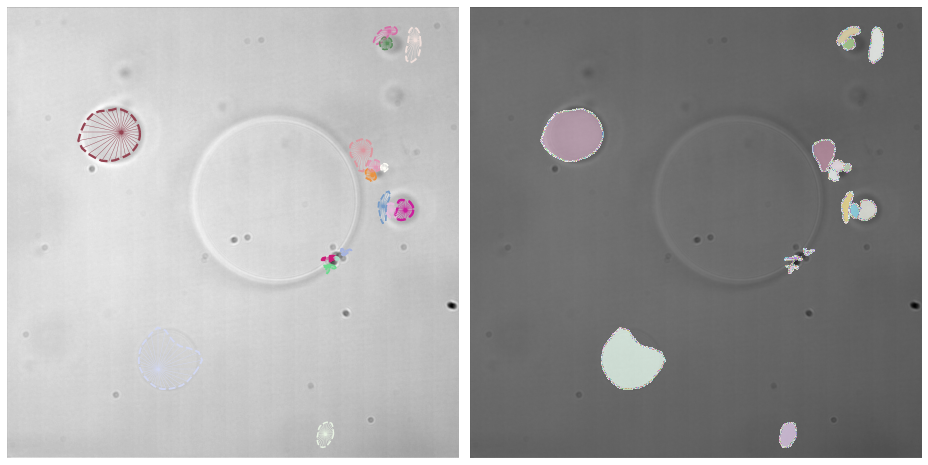

In [8]:
np.random.seed(6)
lbl_cmap = random_label_cmap()

plt.figure(figsize=(13,10))
img_show = img if img.ndim==2 else img[...,0]
coord, points, prob = details['coord'], details['points'], details['prob']
plt.subplot(121); plt.imshow(img_show, cmap='gray'); plt.axis('off')
a = plt.axis()
_draw_polygons(coord, points, prob, show_dist=True)
plt.axis(a)
plt.subplot(122); plt.imshow(img_show, cmap='gray'); plt.axis('off')
plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
plt.tight_layout()
plt.show()

In [9]:
paper_model = StarDist2D.from_pretrained('2D_paper_dsb2018')

Found model '2D_paper_dsb2018' for 'StarDist2D'.
Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.417819, nms_thresh=0.5.


In [10]:
labels, details = paper_model.predict_instances(normalize(img))

1/1 [==============================] - 1s 879ms/step


Text(0.5, 1.0, 'prediction + input overlay')

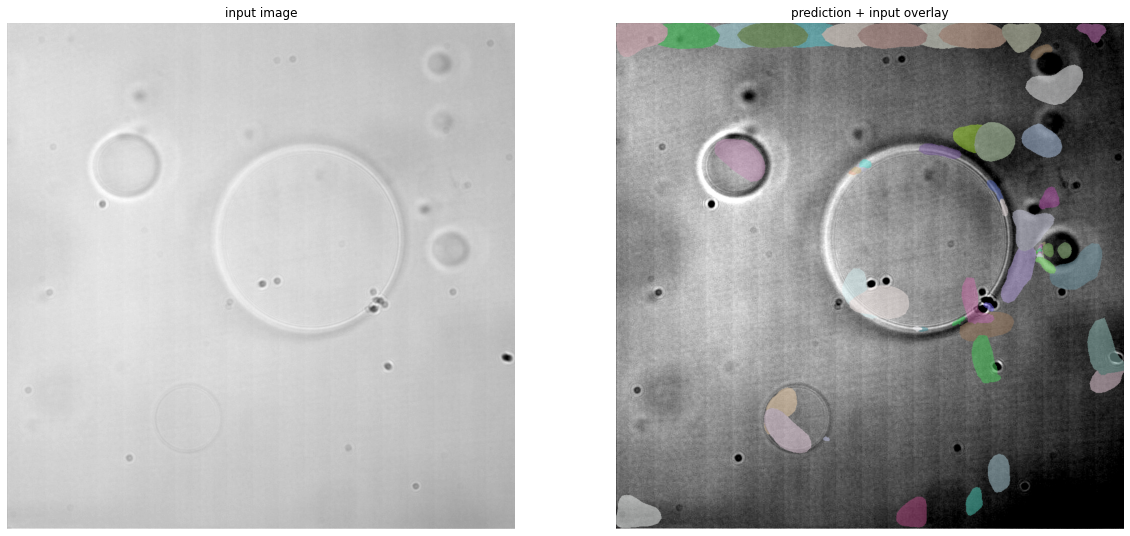

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img))
plt.axis("off")
plt.title("prediction + input overlay")